In [38]:
import cv2
from os import listdir
from os.path import join, isfile
import numpy as np
import sys
from matplotlib import pyplot as plt

print(cv2.__version__)

base_dir = 'C:/Users/ricardo/source/repos/jupyter_samples/ml_try_outs/opencv'
cascade = join(base_dir, 'haarcascades/haarcascade_frontalface_default.xml')

4.0.0


In [4]:
video_capture = cv2.VideoCapture(1)
while True:
    ret, frame = video_capture.read()
    
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    cv2.imshow('video', frame)
    cv2.imshow('video-gray', gray)
    
    if(cv2.waitKey(1) & 0xFF == ord('q')):
        break
    
video_capture.release()
cv2.destroyAllWindows()

In [11]:
faceCascade = cv2.CascadeClassifier(cascade)

video_capture = cv2.VideoCapture(1)

while True:
    ret, frame = video_capture.read()
    
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    faces = faceCascade.detectMultiScale(gray)
    
    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)
       
    cv2.imshow('video', frame)
    
    if(cv2.waitKey(1) & 0xFF == ord('q')):
        break
    
video_capture.release()
cv2.destroyAllWindows()

In [40]:
video_capture.release()
cv2.destroyAllWindows()
base_dir

'C:/Users/ricardo/source/repos/jupyter_samples/ml_try_outs/opencv'

In [41]:
labels = ["closed-eyes", "happy", "laughing", "sad", "super-fat", "bts", "bbt"]

cap_type = "bts"
video_capture = cv2.VideoCapture(1)

frame_rate = 30
frame_count = 0

while True:
    ret, frame = video_capture.read()
    
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    faces = faceCascade.detectMultiScale(gray)
    X = 0
    X2 = 10
    Y = 0
    Y2 = 10
    
    for (x, y, w, h) in faces:
        file_name = "faces" + str(frame_count) + ".jpg"
        full_path = join(base_dir, "samples3", cap_type, file_name)
        #print(full_path)
        
        cropped = frame[y:y+h, x:x+w]
        
        cv2.imwrite(full_path, cropped)
        
        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)
        
        X = x
        Y = y
        X2 = x + w
        Y2 = y + h
        break
       
    cropped = frame[Y:Y2, X:X2]
    cv2.imshow("cropped", cropped)
        
    cv2.imshow('video', frame)
    
    frame_count += 1
    
    if(cv2.waitKey(1) & 0xFF == ord('q')):
        break
    
video_capture.release()
cv2.destroyAllWindows()

let's try make predictions on this

In [6]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.12.0


In [5]:
samples_base_dir = "C:/Users/ricardo/source/repos/jupyter_samples/ml_try_outs/opencv/samples2"
labels = ["hellen", "hellen2", "player", "sheldon", "teddy"]
#labels.index("closed-eyes")

In [6]:
def resize(img):
    return img

In [7]:
def getData(search_dir, labels):
    print(listdir(search_dir))

    X = []
    y = []

    width = 100
    height = 100

    for dirLabels in listdir(search_dir):
        full_path_label = join(search_dir, dirLabels)
        print(full_path_label)
        
        for label_dir in listdir(full_path_label):
            full_path_label_item = join(full_path_label, label_dir)

            if(isfile(full_path_label_item)):
                try:
                    img = cv2.imread(full_path_label_item, cv2.IMREAD_GRAYSCALE)
                    resized = cv2.resize(img, (width, height), interpolation = cv2.INTER_AREA)
                except:
                    pass
                
                X.append(resized)
                y.append(labels.index(str(dirLabels)))
                #print('resized dimensions: ', resized.shape)
            
                #cv2.imshow('resized', resized)
                #cv2.waitKey(0)
                #cv2.destroyAllWindows()
                #break
        
    
    return X, y

In [8]:
listdir(join(base_dir,"samples2"))

['hellen', 'hellen2', 'player', 'sheldon', 'teddy']

In [9]:
samples_dir = join(base_dir, "samples2")
data, labels = getData(samples_dir, labels)
print(labels)

['hellen', 'hellen2', 'player', 'sheldon', 'teddy']
C:/Users/ricardo/source/repos/jupyter_samples/ml_try_outs/opencv\samples2\hellen
C:/Users/ricardo/source/repos/jupyter_samples/ml_try_outs/opencv\samples2\hellen2
C:/Users/ricardo/source/repos/jupyter_samples/ml_try_outs/opencv\samples2\player
C:/Users/ricardo/source/repos/jupyter_samples/ml_try_outs/opencv\samples2\sheldon
C:/Users/ricardo/source/repos/jupyter_samples/ml_try_outs/opencv\samples2\teddy
[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]


In [10]:
data = np.asarray(data)
labels = np.asarray(labels)

In [11]:
data.shape

(121, 100, 100)

In [12]:
labels.shape

(121,)

In [13]:
print('ok')

ok


In [14]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.12.0


In [15]:
indices = np.random.permutation(data.shape[0])
training_idx, test_idx = indices[:80], indices[80:]

In [16]:
indices

array([ 73,  32,  70,  72,  96,  90,  56, 104,  47,  15,  14,   7,  87,
        57,  25,  31, 116,  18,  48,  66,  76,  38,  11,   4,   3,  82,
        49,  30,  80,  17, 101,  98, 103, 117,  39,  89,  61,  53,  78,
       100,   2, 110, 102,  63,  99,  28,  81,  75,  41, 113,  88,  64,
        59,  37,  26,  23,  74,  71,  65,  77,  58,  27,  21, 111,  42,
        86,  51,  29,  44,  93,  55,   5,  34, 106, 118,  22,  36,  46,
       120,   9, 105,  40,  10,  68,  62,  45, 107,  97,  92,  16,  33,
         8,  85,  67,  91,  94,  95,  84,  69,   1,  79,   6,  13,  20,
        50,  43, 114, 112, 119,  52, 109,  19,  54,  60, 108,   0,  24,
        83,  12,  35, 115])

In [17]:
train_images, test_images = data[training_idx,:], data[test_idx,:]
train_labels, test_labels = labels[training_idx], labels[test_idx]
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(80, 100, 100)
(80,)
(41, 100, 100)
(41,)


Text(0.5, 0, 'teddy')

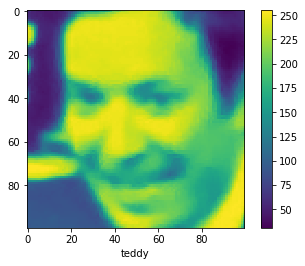

In [18]:
class_names = ["hellen", "hellen2", "player", "sheldon", "teddy"]

plt.figure()
plt.imshow(train_images[4])
plt.colorbar()
plt.grid(False)
plt.xlabel(class_names[train_labels[4]])

In [19]:
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4])

In [20]:
train_images = train_images / 255.0
test_images = test_images / 255.0

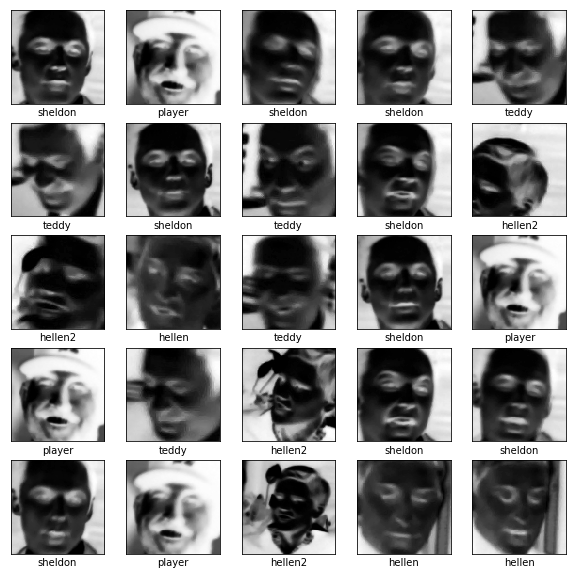

In [21]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

In [22]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(100, 100)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [23]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
80/80 [==============================] - 1s 6ms/step - loss: 4.2668 - acc: 0.0750
Epoch 2/10
80/80 [==============================] - 0s 781us/step - loss: 4.3951 - acc: 0.4750
Epoch 3/10
80/80 [==============================] - 0s 781us/step - loss: 2.9040 - acc: 0.5875
Epoch 4/10
80/80 [==============================] - 0s 977us/step - loss: 1.7800 - acc: 0.7875
Epoch 5/10
80/80 [==============================] - 0s 976us/step - loss: 1.4738 - acc: 0.7875
Epoch 6/10
80/80 [==============================] - 0s 1ms/step - loss: 1.2855 - acc: 0.8000
Epoch 7/10
80/80 [==============================] - 0s 1ms/step - loss: 1.4985 - acc: 0.8000
Epoch 8/10
80/80 [==============================] - 0s 976us/step - loss: 1.1714 - acc: 0.8625
Epoch 9/10
80/80 [==============================] - 0s 1ms/step - loss: 1.1881 - acc: 0.8750
Epoch 10/10
80/80 [==============================] - 0s 1ms/step - loss: 1.3108 - acc: 0.8625


In [24]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

41/41 [==============================] - 0s 3ms/step
Test accuracy: 0.8048780502342596


In [25]:
predictions = model.predict(test_images)
print('predict', np.argmax(predictions[0]))
print('test label', test_labels[0])

predict 1
test label 4


In [47]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

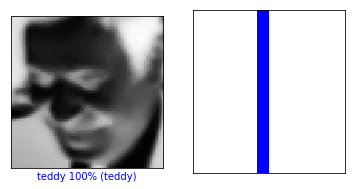

In [48]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)

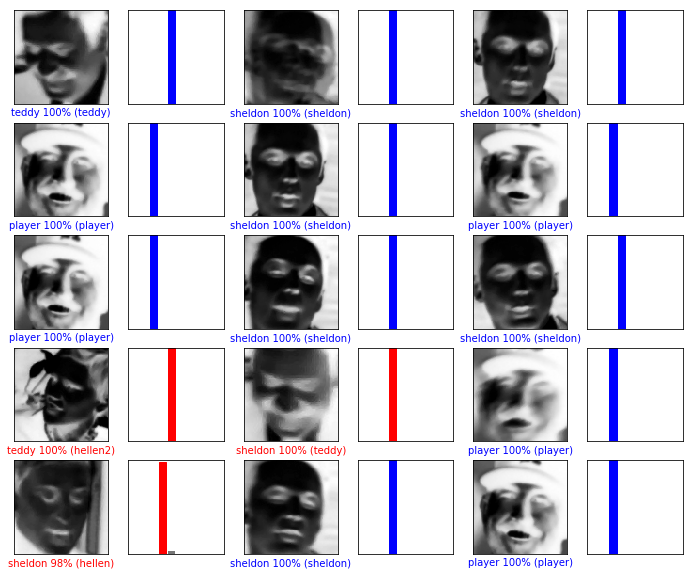

In [49]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)

In [3]:
import cv2
from os import listdir
from os.path import join, isfile
import numpy as np
import sys
from matplotlib import pyplot as plt

print(cv2.__version__)

base_dir = 'C:/Users/ricardo/source/repos/jupyter_samples/ml_try_outs/opencv'
cascade = join(base_dir, 'haarcascades/haarcascade_frontalface_default.xml')
faceCascade = cv2.CascadeClassifier(cascade)

4.0.0


In [51]:
#time to predict thing hahuahuhahuahuha
video_capture = cv2.VideoCapture(1)

font                   = cv2.FONT_HERSHEY_SIMPLEX
bottomLeftCornerOfText = (10,500)
fontScale              = 1
fontColor              = (255,255,255)
lineType               = 2

while True:
    ret, frame = video_capture.read()
    
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    faces = faceCascade.detectMultiScale(gray)
    
    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)
        cv2.putText(frame, 'Who is this?', (x,y), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2)
       
    cv2.imshow('video', frame)
    
    if(cv2.waitKey(1) & 0xFF == ord('q')):
        break
    
video_capture.release()
cv2.destroyAllWindows()

In [52]:
video_capture.release()
cv2.destroyAllWindows()

In [37]:
#time to predict thing hahuahuhahuahuha
video_capture = cv2.VideoCapture(1)

font                   = cv2.FONT_HERSHEY_SIMPLEX
bottomLeftCornerOfText = (10,500)
fontScale              = 1
fontColor              = (255,255,255)
lineType               = 2
width                  = 100
height                 = 100
predictionText         = "Who is this?"

while True:
    ret, frame = video_capture.read()
    
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    faces = faceCascade.detectMultiScale(gray)
    
    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)
        
        cropped = gray[y:y+h, x:x+w]
        test_img = cv2.resize(cropped, (width, height), interpolation = cv2.INTER_AREA)
    
        test_img = np.asarray([test_img])
        predictions = model.predict(test_img)
        #print('predict', np.argmax(predictions[0]))
        #print('test label', labels[np.argmax(predictions[0])])
        predictionText = labels[np.argmax(predictions[0])]
        
        cv2.putText(frame, predictionText, (x,y), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2)
       
    cv2.imshow('video', frame)
    cv2.imshow('predict', cropped)
    
    
    if(cv2.waitKey(1) & 0xFF == ord('q')):
        break
    
video_capture.release()
cv2.destroyAllWindows()

In [ ]:
predictions = model.predict(test_images)
print('predict', np.argmax(predictions[0]))
print('test label', test_labels[0])

In [26]:
l = np.asarray(['l'])

In [27]:
l.shape

(1,)

In [30]:
labels = ["hellen", "hellen2", "player", "sheldon", "teddy"]

In [31]:
labels[0]

'hellen'